<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt6/g12c_s22847_p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dla danych “CIFAR10 small image classification” z biblioteki Keras zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

https://www.cs.toronto.edu/~kriz/cifar.html

170498071/170498071 [==============================] - 13s 0us/step
[6]


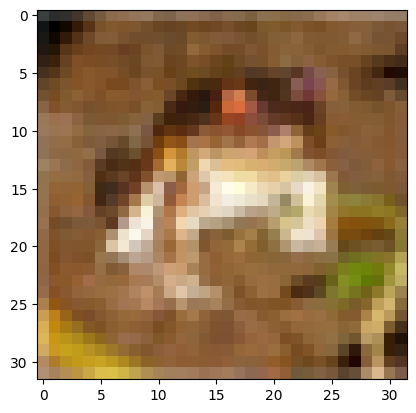

[9]


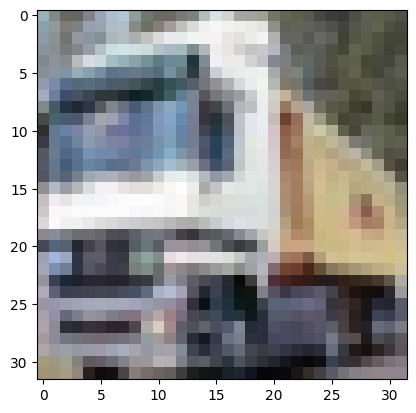

[9]


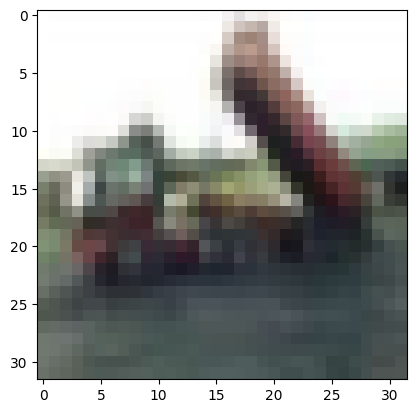

[4]


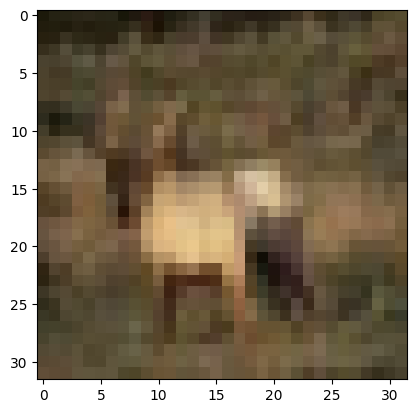

[1]


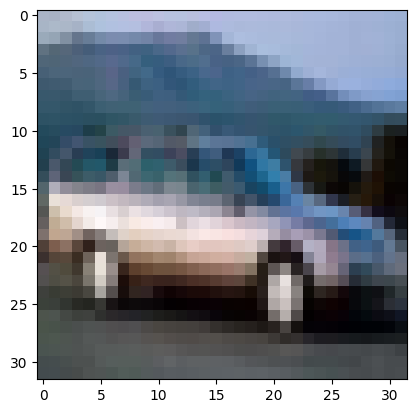

[1]


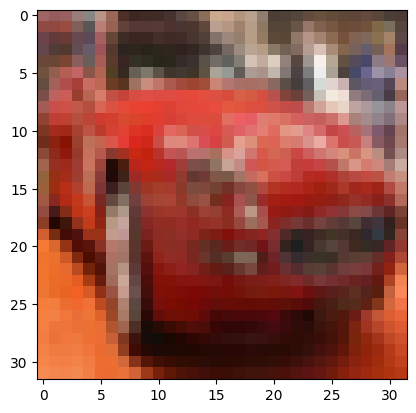

[2]


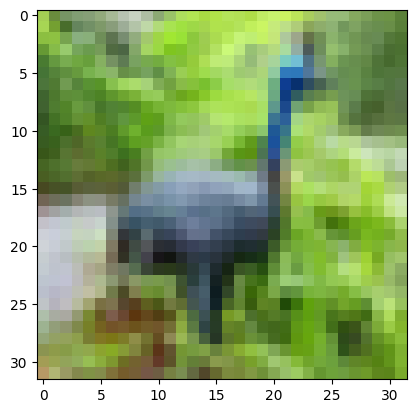

[7]


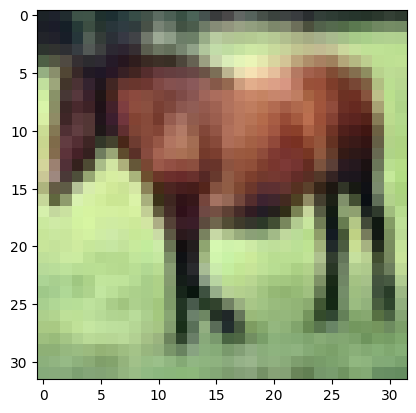

[8]


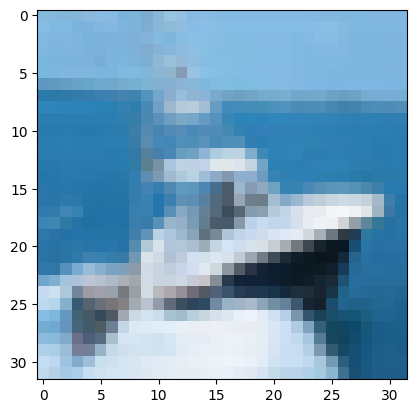

[3]


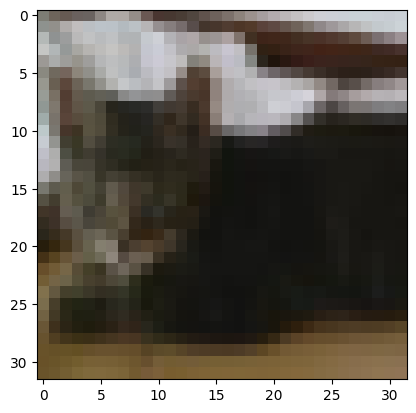

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

(X_train, y_train) = cifar10.load_data()[0]
(X_test, y_test) = cifar10.load_data()[1]
#0 airplane
#1 automobile
#2 bird
#3 cat
#4 deer
#5 dog
#6 frog
#7 horse
#8 ship
#9 truck



for i in range(10):
  print(y_train[i])
  plt.imshow(X_train[i])
  plt.show()

#W oparciu o sieć konwolucyjną, zaproponuj klasyfikator, klasyfikujący dwie z dziesięciu klas. Przetestuj różne funkcje aktywacji.



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

#przeksztalcenie na wekor jednowymiarowy
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

#wybieramy tylko 2 pierwsze klasy 0 i 1
X_train = X_train[np.logical_or(y_train == 0, y_train == 1)]
y_train = y_train[np.logical_or(y_train == 0, y_train == 1)]
X_test = X_test[np.logical_or(y_test == 0, y_test == 1)]
y_test = y_test[np.logical_or(y_test == 0, y_test == 1)]

# normalizujemy dane
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# przekształcamy y_train i y_test na kodowanie kategorialne
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_train, y_train))

model.save('miw_s22847_g12_{}_model_fit.h5'.format(1))

Epoch 1/10
782/782 [==============================] - 17s 9ms/step - loss: 7.6336e-04 - accuracy: 1.0000 - val_loss: 1.1542e-06 - val_accuracy: 1.0000
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 7.7860e-07 - accuracy: 1.0000 - val_loss: 5.3078e-07 - val_accuracy: 1.0000
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 4.2752e-07 - accuracy: 1.0000 - val_loss: 3.4021e-07 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 2.9351e-07 - accuracy: 1.0000 - val_loss: 2.4973e-07 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 2.2279e-07 - accuracy: 1.0000 - val_loss: 1.9644e-07 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7921e-07 - accuracy: 1.0000 - val_loss: 1.6170e-07 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.4967e-07 - accuracy: 1.

In [ ]:
from tensorflow import keras
model = keras.models.load_model('miw_s22847_g12_{}_model_fit.h5'.format(1))
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

accuracy: 0.5
loss: 0.6931502223014832


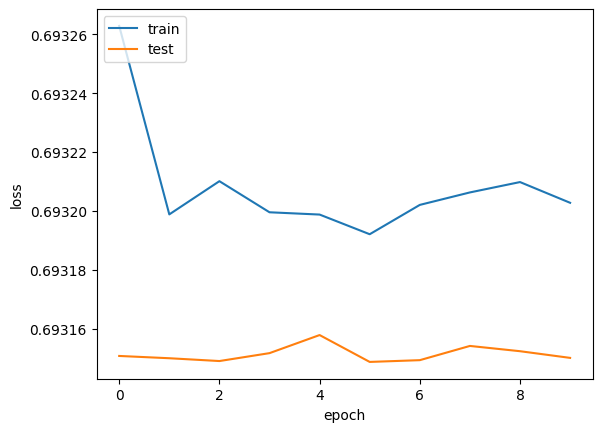

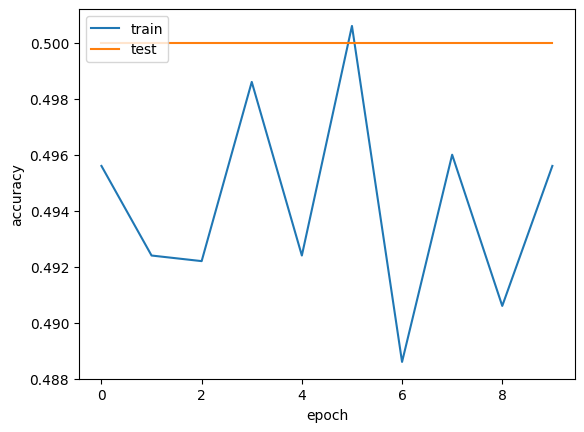

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Zaproponuj klasyfikator z jedną, dwiema oraz trzema warstwami konwolucyjnymi. Eksperymentuj z parametrami. 

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(2, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model1.save('miw_s22847_g12_{}_model1_fit.h5'.format(1))


Epoch 1/10
157/157 [==============================] - 5s 30ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.6932 - accuracy: 0.4914 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
157/157 [==============================] - 6s 40ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 5s 31ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model2.save('miw_s22847_g12_{}_model2_fit.h5'.format(1))

Epoch 1/10
157/157 [==============================] - 9s 52ms/step - loss: 0.6933 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 8s 50ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
157/157 [==============================] - 8s 51ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
157/157 [==============================] - 7s 45ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
157/157 [==============================] - 8s 51ms/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 7s 48ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model3.save('miw_s22847_g12_{}_model3_fit.h5'.format(1))


Epoch 1/10
157/157 [==============================] - 10s 59ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
157/157 [==============================] - 8s 53ms/step - loss: 0.6933 - accuracy: 0.4894 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 9s 58ms/step - loss: 0.6932 - accuracy: 0.4882 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
157/157 [==============================] - 9s 58ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
157/157 [==============================] - 9s 57ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
157/157 [==============================] - 11s 71ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
157/157 [==============================] - 13s 80ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5

#Porównaj wyniki z poprzedniego punktu i zaproponuj optymalny klasyfikator dla objaśnianego problemu. Przedstaw porównanie graficznie. 
Wyjaśnij, jaki wpływ mają parametry modeli? (por. Conv2D, Dense, itp.)

accuracy: 0.5
loss: 0.6931482553482056


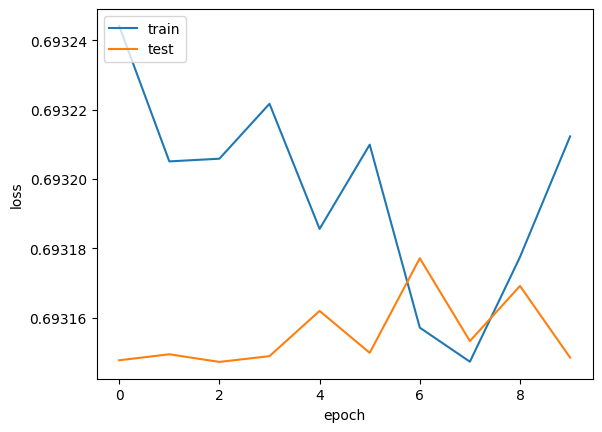

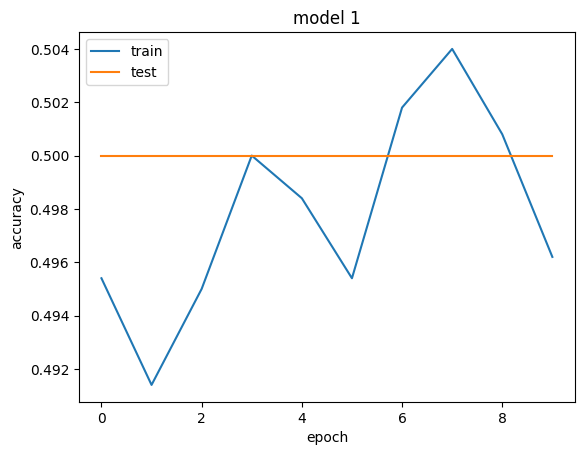

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('miw_s22847_g12_{}_model1_fit.h5'.format(1))
loss, acc = model1.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# przedstawienie graficzne
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 1')
plt.show()

accuracy: 0.5
loss: 0.6931625604629517


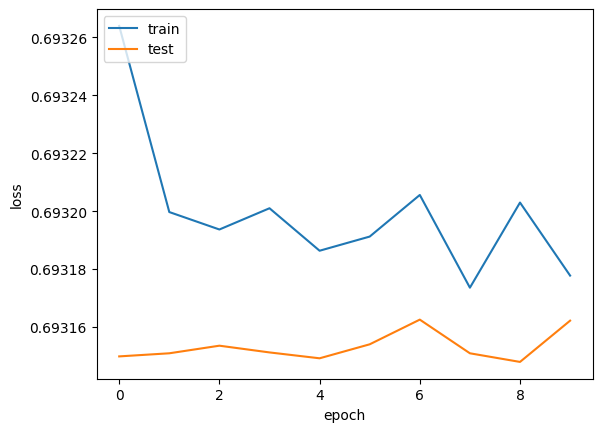

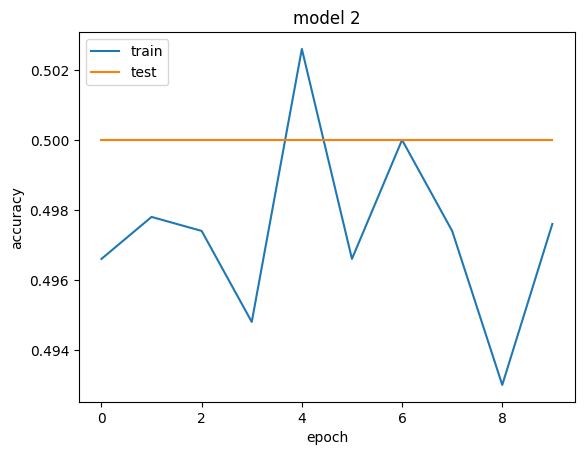

In [ ]:
from keras.callbacks import History
from tensorflow import keras
model2 = keras.models.load_model('miw_s22847_g12_{}_model2_fit.h5'.format(1))
loss, acc = model2.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# przedstawienie graficzne
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 2')
plt.show()

accuracy: 0.5
loss: 0.6931467056274414


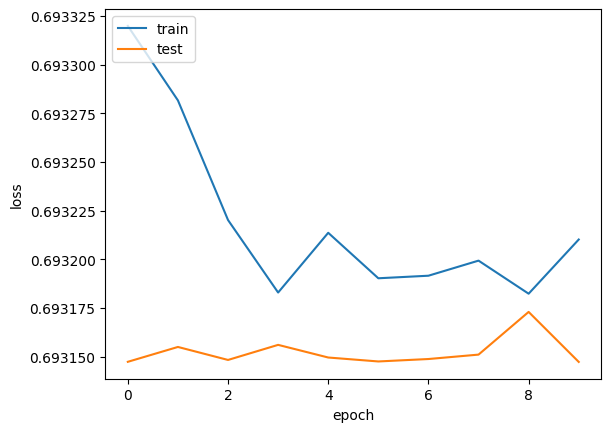

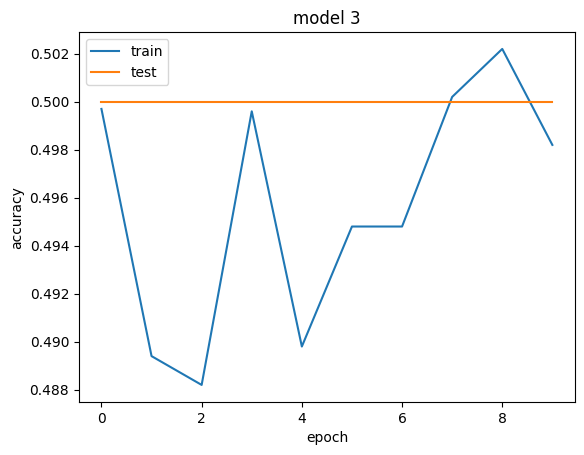

In [ ]:
from keras.callbacks import History
from tensorflow import keras
model3 = keras.models.load_model('miw_s22847_g12_{}_model3_fit.h5'.format(1))
loss, acc = model3.evaluate(X_train, y_train, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

# przedstawienie graficzne
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('model 3')
plt.show()